In [ ]:
'''Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset.
Determine the number of clusters using the elbow method'''

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("sales_data_sample.csv",encoding = 'Latin-1')
## if we don't add "",encoding = 'Latin-1'"" then we get error 

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [6]:
## so only two columns are important of the dataset i.e. QuantityOrdered and PriceEach other are irrelevant
data=df[['QUANTITYORDERED','PRICEEACH']]

In [7]:
data.head(4)

,QUANTITYORDERED,PRICEEACH
0,30,95.70
1,34,81.35
2,41,94.74
3,45,83.26


In [8]:
##NORMALIZATION 

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

normalized_data=scaler.fit_transform(data)
print(normalized_data)

[[-0.52289086  0.5969775 ]
 [-0.11220131 -0.11445035]
 [ 0.60650538  0.54938372]
 ...
 [ 0.81185016  0.81015797]
 [-0.11220131 -1.06186404]
 [ 1.2225397  -0.89925195]]


In [9]:
## Using elbow method , determine the best value of k
# wcss= within cluster sum of squares . It's a measure of how close data points are to the centroid of their cluster
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,16):
    
    k_means=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=10)
    k_means.fit(normalized_data)
    
    wcss.append(k_means.inertia_)

     # Here
    # n_clusters specifies the number of clusters you want the algorithm to find in your data.
    # init determines the method for initializing the positions of the cluster centers (centroids). 'k-means++'is the default and recommended method.
    # max_iter=300 Sets the maximum number of iterations the algorithm will run for a single initialization.
    # n_init=10 Specifies the number of times the KMeans algorithm will run with different centroid seeds.

Text(0.5, 1.0, 'Elbow Curve Graph')

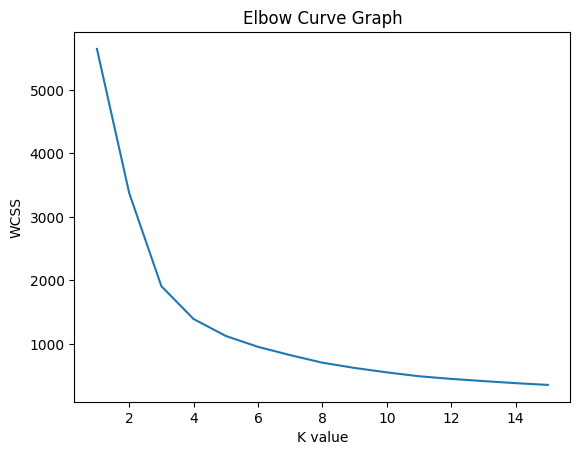

In [10]:
## Elbow Graph
import matplotlib.pyplot as plt
plt.plot(range(1,16),wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.title("Elbow Curve Graph")

In [11]:
# from graph we can see that for k=4 is the optimal value , so train the model
# The fit_predict method combines the operations of fitting the model and predicting


k_means=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=10)
clusters=k_means.fit_predict(normalized_data)


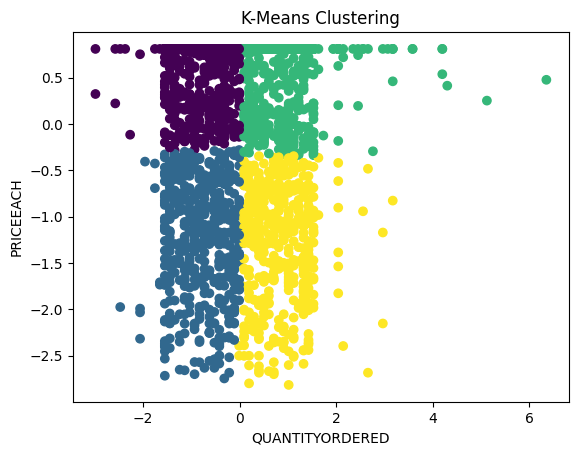

In [12]:
## Visualization of the clusters
# x aixs numbers =normalized_data[:, 0]
# y aixs numbers =normalized_data[:, 1]
# The c parameter specifies the color of the markers (data points) in the scatter plot
# The cmap parameter stands for "colormap." It defines the colormap used to map numerical data to colors.

plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=clusters, cmap='viridis')

plt.xlabel('QUANTITYORDERED')
plt.ylabel('PRICEEACH')
plt.title('K-Means Clustering')
plt.show()